In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Bachelor_Thesis_2024_Sinthuyan/IOTA_wealth_NV_2024/data/iota_h0_h1_components_with_balance_removing_0Values.csv'
clustered_data = pd.read_csv(file_path)


FileNotFoundError: [Errno 2] No such file or directory: 'Bachelor_Thesis_2024_Sinthuyan/IOTA_wealth_NV_2024/data/iota_h0_h1_components_with_balance_removing_0Values.csv'

Gini Coefficient for Wealth Distribution by Clustered Addresses: 0.9961721634801671


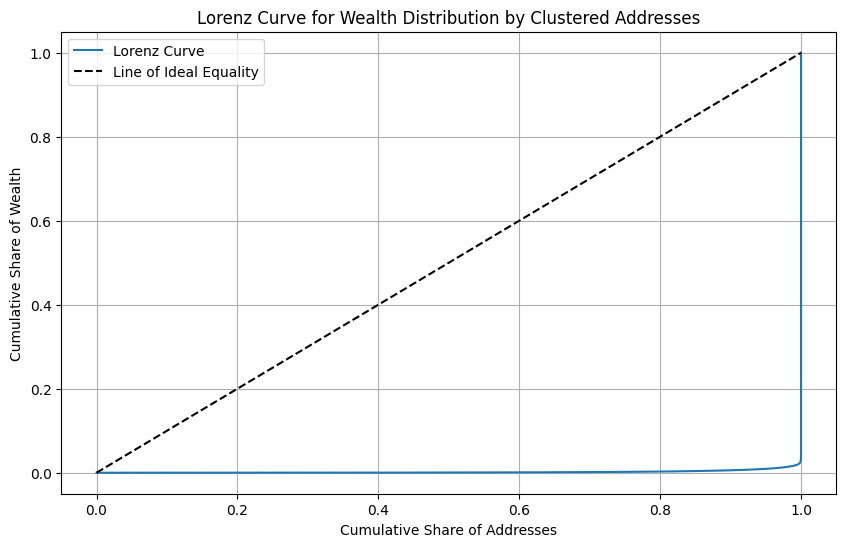

In [11]:
# Calculate the Gini coefficient
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))
    return gini

# Extract the total balance
balances = clustered_data['total_balance'].values

# Calculate the Gini coefficient for the balances
gini = gini_coefficient(balances)
print(f"Gini Coefficient for Wealth Distribution by Clustered Addresses: {gini}")

# Plot the Lorenz curve
def plot_lorenz_curve(balances):
    sorted_balances = np.sort(balances)
    cumulative_balances = np.cumsum(sorted_balances)
    total_balances = cumulative_balances[-1]
    cumulative_share_of_balances = cumulative_balances / total_balances
    cumulative_share_of_addresses = np.arange(1, len(balances) + 1) / len(balances)

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_share_of_addresses, cumulative_share_of_balances, label='Lorenz Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Line of Ideal Equality')
    plt.xlabel('Cumulative Share of Addresses')
    plt.ylabel('Cumulative Share of Wealth')
    plt.title('Lorenz Curve for Wealth Distribution by Clustered Addresses')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lorenz_curve(balances)

Nakamoto Coefficient: 1


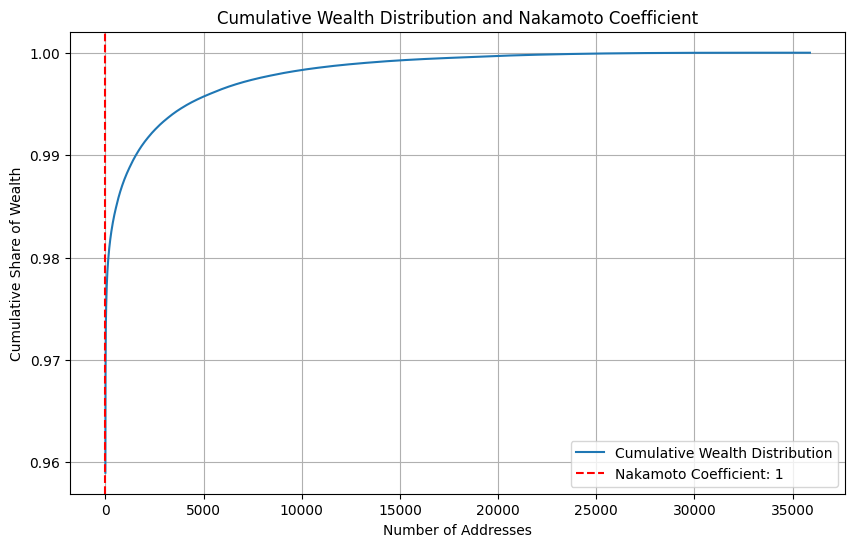

In [12]:
# Assuming the correct column name is 'total_balance' (update as necessary)
balances = clustered_data['total_balance'].values  # Replace 'total_balance' with the correct column name

# Sort the balances in descending order
sorted_balances = np.sort(balances)[::-1]
cumulative_balances = np.cumsum(sorted_balances)
total_balances = cumulative_balances[-1]
cumulative_share_of_balances = cumulative_balances / total_balances

# Calculate the Nakamoto coefficient
nakamoto_coefficient = np.argmax(cumulative_share_of_balances >= 0.5) + 1
print(f"Nakamoto Coefficient: {nakamoto_coefficient}")

# Plot the cumulative wealth distribution and highlight the Nakamato coefficient
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(balances) + 1), cumulative_share_of_balances, label='Cumulative Wealth Distribution')
plt.axvline(nakamoto_coefficient, color='r', linestyle='--', label=f'Nakamoto Coefficient: {nakamoto_coefficient}')
plt.xlabel('Number of Addresses')
plt.ylabel('Cumulative Share of Wealth')
plt.title('Cumulative Wealth Distribution and Nakamoto Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
from prettytable import PrettyTable


# Define balance ranges
balance_ranges = [
    (0, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000),
    (100000, 1000000),
    (1000000, 10000000),
    (10000000, float('inf'))
]

# Initialize lists to store the results
balance_range_labels = []
num_addresses = []
percentage_of_wealth = []
percentage_of_addresses = []

# Calculate total wealth and total number of addresses
total_wealth = sum(balances)
total_addresses = len(balances)

# Calculate statistics for each balance range
for lower, upper in balance_ranges:
    if upper == float('inf'):
        label = f'>= ${lower:,}'
    else:
        label = f'${lower:,} & < ${upper:,}'
    
    balance_range_labels.append(label)
    in_range = (balances >= lower) & (balances < upper)
    num_addresses_in_range = sum(in_range)
    wealth_in_range = sum(balances[in_range])
    
    num_addresses.append(f'{num_addresses_in_range:,}')
    percentage_of_wealth.append(f'{(wealth_in_range / total_wealth) * 100:.2f}%')
    percentage_of_addresses.append(f'{(num_addresses_in_range / total_addresses) * 100:.2f}%')

# Create a PrettyTable to display the results
table = PrettyTable()
table.field_names = ['Balance in USD', 'Number of Addresses', 'Percentage of Wealth', 'Percentage of Addresses']

for i in range(len(balance_range_labels)):
    table.add_row([balance_range_labels[i], num_addresses[i], percentage_of_wealth[i], percentage_of_addresses[i]])

print(table)

+----------------------------+---------------------+----------------------+-------------------------+
|       Balance in USD       | Number of Addresses | Percentage of Wealth | Percentage of Addresses |
+----------------------------+---------------------+----------------------+-------------------------+
|        $0 & < $100         |          9          |        0.00%         |          0.03%          |
|      $100 & < $1,000       |          30         |        0.00%         |          0.08%          |
|     $1,000 & < $10,000     |         166         |        0.00%         |          0.46%          |
|    $10,000 & < $100,000    |          9          |        0.00%         |          0.03%          |
|  $100,000 & < $1,000,000   |          50         |        0.00%         |          0.14%          |
| $1,000,000 & < $10,000,000 |        2,913        |        0.00%         |          8.12%          |
|       >= $10,000,000       |        32,705       |       100.00%        |       